# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# [Dependencias y resultados previos](./03-segmentacion.ipynb)

## Dependencias

In [2]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters

## Resultados

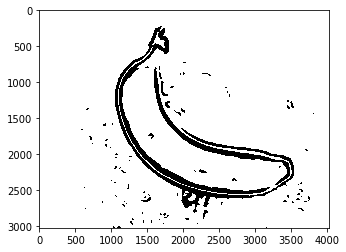

In [3]:
img = io.imread('./imgs/examples/banana_example.jpg')
banana_float = img_as_float(img)

banana = color.rgb2gray(banana_float)
bg1 = filters.gaussian(banana, sigma=20)
bc1 = filters.sobel(bg1)

th = filters.threshold_otsu(bc1)
bf = bc1 < th

fig, ax = plt.subplots()
ax.imshow(bf)

---
# Extracción de características
---

La extracción de características de la imágen filtrada y segmentada es el último paso, previo a los algoritmos de clasificación.

La extracción consiste en obtener valores numéricos característicos de la imagen que serán la entrada a los algoritmos _K-means_ y _K-nn_.

## Histograma de Gradientes Orientados (HOG)

Se utiliza el algoritmo **HOG** porque la documentación indica que es muy adecuada y popular para reconocimiento de objetos.

In [19]:
from skimage.feature import hog

features = hog(bc1).ravel()

#f, ax = plt.subplots()
#ax.imshow(hog_img)

In [20]:
print(features)
print(features.dtype, features.size, features.shape)
#features = hog_img.ravel()
#print(features)
#print(features.dtype, features.size, features.shape)

[0.00199165 0.00162954 0.02417816 ... 0.         0.00013947 0.09059246]
float64 15288912 (15288912,)


## Análisis de Componente Principal (PCA)

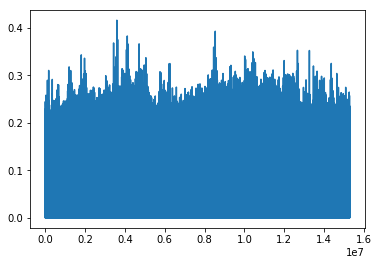

In [21]:
from sklearn.decomposition import PCA

plt.plot(features)
#pca = PCA(n_components=2, svd_solver='full')
#pca.fit(hog_img)
#pf = pca.transform(hog_img)

In [32]:
print(pf)
print(pf.dtype)
print(pf.shape)

[[-2.14037064e-02  1.61022538e-16]
 [ 2.14037064e-02 -1.61015762e-16]]
float64
(2, 2)
